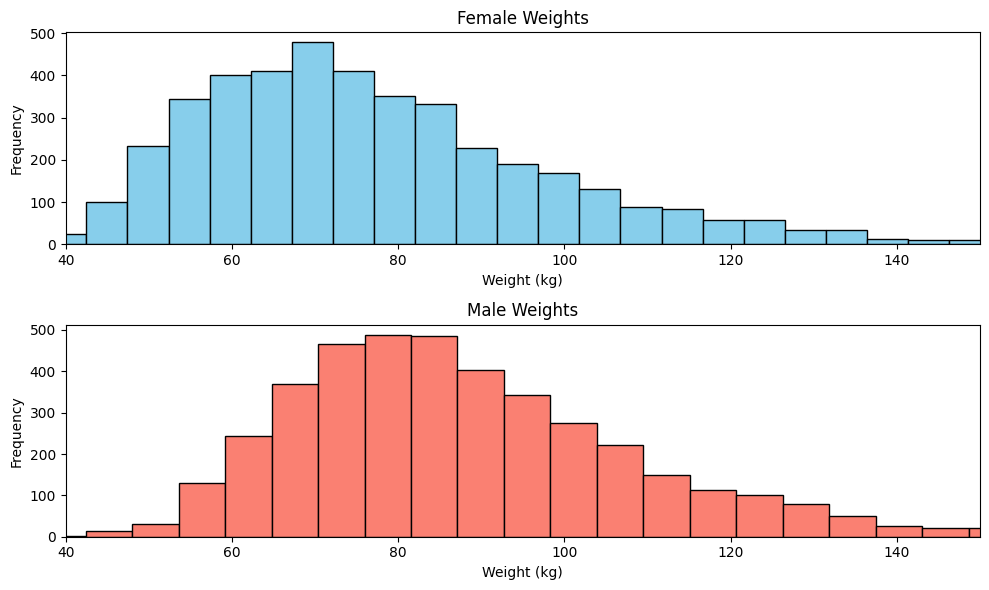

C:\Users\SSudh\AppData\Local\Temp\ipykernel_6736\3960420320.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


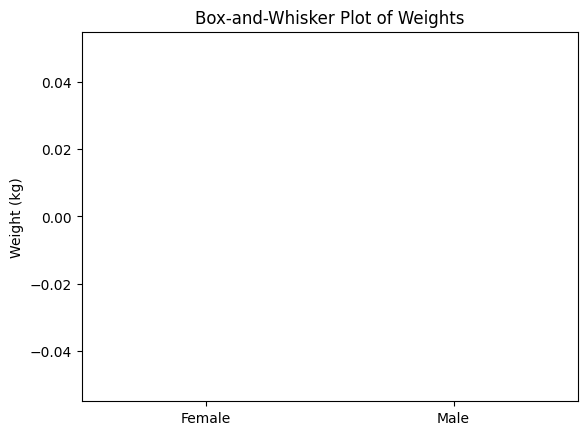

Female Mean: nan, Median: nan, Variance: nan, Std: nan
Male Mean: nan, Median: nan, Variance: nan, Std: nan

Updated Female Data with BMI:
 [[         nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import pandas as pd

# Loading the  dataset into my code 
male_file = "nhanes_adult_male_bmx_2020.csv"
female_file = "nhanes_adult_female_bmx_2020.csv"

male = np.genfromtxt(male_file, delimiter=',', skip_header=1, dtype=float)
female = np.genfromtxt(female_file, delimiter=',', skip_header=1, dtype=float)

# Extraacting the weights from the dataset 
female_weights = female[:, 0]
male_weights = male[:, 0]

# Doing a Basic Statistic Calculation 
female_mean = np.mean(female_weights)
female_median = np.median(female_weights)
female_variance = np.var(female_weights)
female_std = np.std(female_weights)

male_mean = np.mean(male_weights)
male_median = np.median(male_weights)
male_variance = np.var(male_weights)
male_std = np.std(male_weights)

# Adding BMI to female data
female_heights = female[:, 1] / 100
female_bmi = female_weights / (female_heights ** 2)
female = np.column_stack((female, female_bmi))

# Ploting Histograms 
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='skyblue', edgecolor='black')
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim([40, 150])

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='salmon', edgecolor='black')
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim([40, 150])
plt.tight_layout()
plt.show()

# Adding a Boxplot For Weights 
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Box-and-Whisker Plot of Weights')
plt.ylabel('Weight (kg)')
plt.show()

# Standardizeing Female Data 
female_means = female.mean(axis=0)
female_stds = female.std(axis=0)
zfemale = (female - female_means) / female_stds

# Adding waist-to-height and waist-to-hip ratios for both males and females 
male_waist_height_ratio = male[:, 6] / male[:, 1]
male_waist_hip_ratio = male[:, 6] / male[:, 5]
male = np.column_stack((male, male_waist_height_ratio, male_waist_hip_ratio))

female_waist_height_ratio = female[:, 6] / female[:, 1]
female_waist_hip_ratio = female[:, 6] / female[:, 5]
female = np.column_stack((female, female_waist_height_ratio, female_waist_hip_ratio))

# Boxploting for  the ratios
plt.boxplot(
    [female[:, -2], male[:, -2], female[:, -1], male[:, -1]],
    labels=['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip']
)
plt.title('Box-and-Whisker Plot for Ratios')
plt.ylabel('Ratio')
plt.show()

# Scatterplot for  matrix
zfemale_df = pd.DataFrame(zfemale[:, [1, 0, 7, 6, 5]], columns=["Height", "Weight", "BMI", "Waist", "Hip"])
sns.pairplot(zfemale_df, diag_kind='kde')
plt.suptitle("Scatterplot Matrix (Standardized Data)", y=1.02)
plt.show()

# showing Correlations between variables
variables = zfemale_df.columns
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pearson_corr, _ = pearsonr(zfemale_df[variables[i]], zfemale_df[variables[j]])
        spearman_corr, _ = spearmanr(zfemale_df[variables[i]], zfemale_df[variables[j]])
        print(f"{variables[i]} vs {variables[j]}: Pearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")

# Extracting and printing standardized data for extreme BMI values
female_bmi_sorted_indices = np.argsort(female[:, 7])
lowest_bmi_indices = female_bmi_sorted_indices[:5]
highest_bmi_indices = female_bmi_sorted_indices[-5:]
extreme_bmi_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))
print("\nStandardized measurements for extreme BMI individuals:")
print(zfemale[extreme_bmi_indices])
